In [7]:
import pandas as pd

website_traffic = pd.read_csv("website_traffic.csv")
website_traffic.columns

Index(['Page Views', 'Session Duration', 'Bounce Rate', 'Traffic Source',
       'Time on Page', 'Previous Visits', 'Conversion Rate'],
      dtype='object')

In [9]:
website_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


In [11]:
website_traffic = website_traffic.rename(columns={'Page Views': 'Page_Views', 'Session Duration': 'Session_Duration', 'Bounce Rate': 
                                                  'Bounce_Rate', 'Traffic Source': 'Traffic_Source', 'Time on Page': 
                                                  'Time_on_Page', 'Previous Visits': 'Previous_Visits', 'Conversion Rate': 'Conversion_Rate'})

In [13]:
website_traffic.columns

Index(['Page_Views', 'Session_Duration', 'Bounce_Rate', 'Traffic_Source',
       'Time_on_Page', 'Previous_Visits', 'Conversion_Rate'],
      dtype='object')

In [15]:
website_traffic_corr = website_traffic.corr(numeric_only=True)
website_traffic_corr

,Page_Views,Session_Duration,Bounce_Rate,Time_on_Page,Previous_Visits,Conversion_Rate
Page_Views,1.000000,-0.012788,0.030223,0.023941,0.028595,0.126635
Session_Duration,-0.012788,1.000000,-0.015931,-0.013985,-0.025534,0.177798
Bounce_Rate,0.030223,-0.015931,1.000000,0.039340,-0.015860,-0.049051
Time_on_Page,0.023941,-0.013985,0.039340,1.000000,-0.028729,0.229669
Previous_Visits,0.028595,-0.025534,-0.015860,-0.028729,1.000000,0.109496
Conversion_Rate,0.126635,0.177798,-0.049051,0.229669,0.109496,1.000000


In [17]:
conversion_rate_corr = website_traffic_corr[['Conversion_Rate']]
conversion_rate_corr

,Conversion_Rate
Page_Views,0.126635
Session_Duration,0.177798
Bounce_Rate,-0.049051
Time_on_Page,0.229669
Previous_Visits,0.109496
Conversion_Rate,1.000000


In [19]:
conversion_rate_corr = conversion_rate_corr.drop('Bounce_Rate', axis=0)
conversion_rate_corr

,Conversion_Rate
Page_Views,0.126635
Session_Duration,0.177798
Time_on_Page,0.229669
Previous_Visits,0.109496
Conversion_Rate,1.000000


In [21]:
y= website_traffic.Conversion_Rate
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1995    1.0
1996    1.0
1997    1.0
1998    1.0
1999    1.0
Name: Conversion_Rate, Length: 2000, dtype: float64

In [23]:
# feature selection
website_traffic_features = ["Page_Views", "Session_Duration", "Bounce_Rate", "Time_on_Page", "Previous_Visits"]
X = website_traffic[website_traffic_features]
X

,Page_Views,Session_Duration,Bounce_Rate,Time_on_Page,Previous_Visits
0,5,11.051381,0.230652,3.890460,3
1,4,3.429316,0.391001,8.478174,0
2,4,1.621052,0.397986,9.636170,2
3,5,3.629279,0.180458,2.071925,3
4,5,4.235843,0.291541,1.960654,5
...,...,...,...,...,...
1995,1,2.724513,0.207187,1.324206,2
1996,3,0.392856,0.095559,3.824416,1
1997,4,9.899823,0.446622,1.288675,1
1998,3,0.393319,0.278340,5.037584,2


In [25]:
from sklearn.tree import DecisionTreeRegressor

website_traffic_model = DecisionTreeRegressor(random_state=1)
website_traffic_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [26]:
from sklearn.metrics import mean_absolute_error

print("Making predictions based on the following feature selected dataset:")
print(X)

predictions = website_traffic_model.predict(X)
print("Predicted values of the conversion rate:")
print(predictions)

error = mean_absolute_error(y, predictions)
print(f"You are off by {error}")

Making predictions based on the following feature selected dataset:
      Page_Views  Session_Duration  Bounce_Rate  Time_on_Page  Previous_Visits
0              5         11.051381     0.230652      3.890460                3
1              4          3.429316     0.391001      8.478174                0
2              4          1.621052     0.397986      9.636170                2
3              5          3.629279     0.180458      2.071925                3
4              5          4.235843     0.291541      1.960654                5
...          ...               ...          ...           ...              ...
1995           1          2.724513     0.207187      1.324206                2
1996           3          0.392856     0.095559      3.824416                1
1997           4          9.899823     0.446622      1.288675                1
1998           3          0.393319     0.278340      5.037584                2
1999           3          0.882638     0.338026      5.186908  

In [29]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

website_traffic_model = DecisionTreeRegressor(random_state=1)
website_traffic_model.fit(train_X, train_y)
predictions = website_traffic_model.predict(val_X)

mae = mean_absolute_error(val_y, predictions)
print(f"MAE = {mae}")

MAE = 0.02442984425495201


In [61]:
print("The Mean Absolute Error (MAE) value of 0.0244 indicates that, on average, the predicted Conversion Rate differs from the actual Conversion \nRate by approximately 0.0244 units. Since the Conversion Rate values range between 0 and 1, this relatively small error suggests that the \nmodel performs well in predicting the conversion rate. The low MAE demonstrates that the model's predictions are very close to the actual \nvalues, confirming that the selected features—Page Views, Session Duration, Bounce Rate, Time on Page, and Previous Visits—are effective \npredictors for the Conversion Rate.")

The Mean Absolute Error (MAE) value of 0.0244 indicates that, on average, the predicted Conversion Rate differs from the actual Conversion 
Rate by approximately 0.0244 units. Since the Conversion Rate values range between 0 and 1, this relatively small error suggests that the 
model performs well in predicting the conversion rate. The low MAE demonstrates that the model's predictions are very close to the actual 
values, confirming that the selected features—Page Views, Session Duration, Bounce Rate, Time on Page, and Previous Visits—are effective 
predictors for the Conversion Rate.


In [35]:
new_website_traffic = website_traffic.drop('Traffic_Source', axis=1)
new_website_traffic

,Page_Views,Session_Duration,Bounce_Rate,Time_on_Page,Previous_Visits,Conversion_Rate
0,5,11.051381,0.230652,3.890460,3,1.0
1,4,3.429316,0.391001,8.478174,0,1.0
2,4,1.621052,0.397986,9.636170,2,1.0
3,5,3.629279,0.180458,2.071925,3,1.0
4,5,4.235843,0.291541,1.960654,5,1.0
...,...,...,...,...,...,...
1995,1,2.724513,0.207187,1.324206,2,1.0
1996,3,0.392856,0.095559,3.824416,1,1.0
1997,4,9.899823,0.446622,1.288675,1,1.0
1998,3,0.393319,0.278340,5.037584,2,1.0


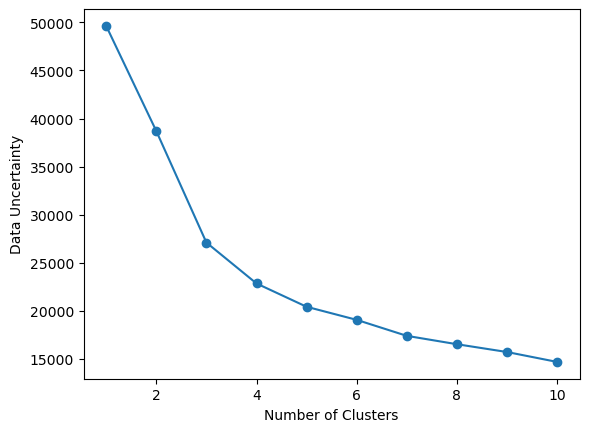

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

clustercol = []

for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit_predict(new_website_traffic)
    clustercol.append(km.inertia_)

fig, ax = plt.subplots()
ax.plot(range(1, 11), clustercol, '-o')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Data Uncertainty')
plt.show()

In [67]:
kmeans = KMeans(n_clusters=4, random_state=40)
kmeans.fit(new_website_traffic)
new_website_traffic['clusters'] = kmeans.predict(new_website_traffic)
new_website_traffic

,Page_Views,Session_Duration,Bounce_Rate,Time_on_Page,Previous_Visits,Conversion_Rate,clusters
0,5,11.051381,0.230652,3.890460,3,1.0,2
1,4,3.429316,0.391001,8.478174,0,1.0,3
2,4,1.621052,0.397986,9.636170,2,1.0,3
3,5,3.629279,0.180458,2.071925,3,1.0,0
4,5,4.235843,0.291541,1.960654,5,1.0,0
...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,1.324206,2,1.0,0
1996,3,0.392856,0.095559,3.824416,1,1.0,0
1997,4,9.899823,0.446622,1.288675,1,1.0,2
1998,3,0.393319,0.278340,5.037584,2,1.0,0


In [78]:
cluster_means = new_website_traffic.groupby('clusters').mean()
cluster_means

,Page_Views,Session_Duration,Bounce_Rate,Time_on_Page,Previous_Visits,Conversion_Rate
clusters,,,,,,
0,3.532338,1.911675,0.283055,2.777583,1.945274,0.963330
1,7.315582,1.941127,0.283810,2.848648,2.116371,0.987403
2,4.758389,8.909333,0.283318,3.450266,1.865772,1.000000
3,4.946292,2.219872,0.290630,8.565875,1.953964,1.000000


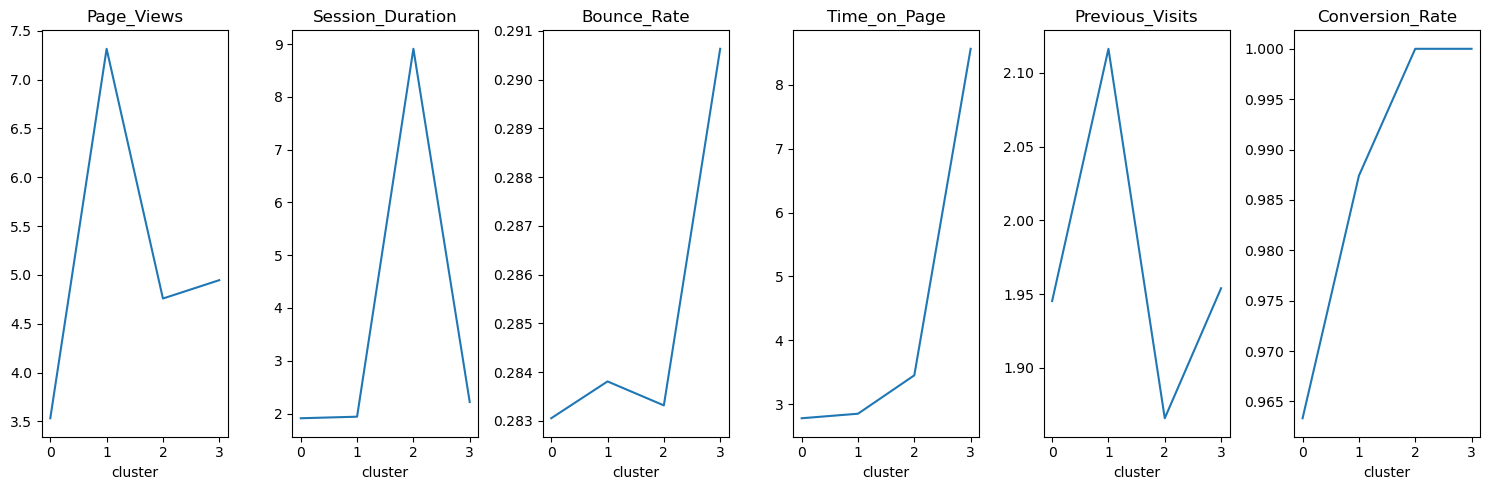

In [79]:
import matplotlib.pyplot as plt

features = ['Page_Views', 'Session_Duration', 'Bounce_Rate', 'Time_on_Page', 'Previous_Visits', 'Conversion_Rate']

fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))

for i, feature in enumerate(features):
    axes[i].plot(cluster_means.index, cluster_means[feature])
    axes[i].set_title(feature)
    axes[i].set_xlabel('cluster')

plt.tight_layout()
plt.show()
